In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Checkpoint 1

In [2]:
# Reading the data
companies = pd.read_csv('companies.txt',delimiter="\t", encoding = 'palmos')
rounds2 = pd.read_csv('rounds2.csv', encoding = 'palmos')

In [3]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [4]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [5]:
# Converting the IDs to upper case
companies['permalink'] = companies['permalink'].str.upper()
rounds2['company_permalink'] = rounds2['company_permalink'].str.upper()

In [6]:
len(companies['permalink'].unique())

66368

In [7]:
len(rounds2['company_permalink'].unique())

66368

In [8]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [9]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


Cleaning companies dataframe

In [10]:
# Removing the companies whose status is closed as investment cannot be made in closed companies
companies =  companies[companies['status'] != 'closed']
companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60130 entries, 0 to 66367
Data columns (total 10 columns):
permalink        60130 non-null object
name             60130 non-null object
homepage_url     55791 non-null object
category_list    57935 non-null object
status           60130 non-null object
country_code     54823 non-null object
state_code       53365 non-null object
region           53851 non-null object
city             53853 non-null object
founded_at       47065 non-null object
dtypes: object(10)
memory usage: 5.0+ MB


In [11]:
# Removing unwanted columns for analysis from comapnies dataframe
companies = companies.drop('founded_at', axis = 1)
companies = companies.drop('homepage_url', axis = 1)
companies = companies.drop('region', axis = 1)
companies = companies.drop('state_code', axis = 1)
companies = companies.drop('city', axis = 1)
companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60130 entries, 0 to 66367
Data columns (total 5 columns):
permalink        60130 non-null object
name             60130 non-null object
category_list    57935 non-null object
status           60130 non-null object
country_code     54823 non-null object
dtypes: object(5)
memory usage: 2.8+ MB


In [12]:
# Removing all the rows having 2 or more unknown or NA values
companies = companies[companies.isnull().sum(axis=1) <= 2]
companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60130 entries, 0 to 66367
Data columns (total 5 columns):
permalink        60130 non-null object
name             60130 non-null object
category_list    57935 non-null object
status           60130 non-null object
country_code     54823 non-null object
dtypes: object(5)
memory usage: 2.8+ MB


In [13]:
# Removing all rows having NA values
companies = companies.dropna(axis = 0)
companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53520 entries, 0 to 66366
Data columns (total 5 columns):
permalink        53520 non-null object
name             53520 non-null object
category_list    53520 non-null object
status           53520 non-null object
country_code     53520 non-null object
dtypes: object(5)
memory usage: 2.4+ MB


In [14]:
# Calculating % of observations lost
100 - 100*len(companies.index)/66368

19.35872709739634

Approx. 19% of data/observations are lost from companies dataframe during cleaning process

Cleaning rounds2 dataframe

In [15]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [16]:
# Removing funding round code as it is not used for analysis purpose
rounds2 = rounds2.drop('funding_round_code', axis = 1)
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 5 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(4)
memory usage: 4.4+ MB


In [17]:
# Calculating % of unknown raised_amount_usd
100*(rounds2['raised_amount_usd'].isnull().sum()/94959)

21.051190513800695

In [18]:
# Now we need to impute the raised_amount_usd with dummy values. To impute, lets first analysis the column
rounds2['raised_amount_usd'].describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

Since the standard deviation is very high, it is better impute unknown or NA values with median

In [19]:
# Calculating median of raised_amount_usd
rounds2['raised_amount_usd'].median()

1680511.0

In [20]:
# Imputing NA values of raised_amount_usd column with median value
rounds2.fillna(1680511.0, inplace=True)
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 5 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funded_at                  114949 non-null object
raised_amount_usd          114949 non-null float64
dtypes: float64(1), object(4)
memory usage: 4.4+ MB


Merging the two data frames

In [21]:
master_frame = pd.merge(companies, rounds2, how="left", left_on='permalink', right_on='company_permalink')
master_frame.shape

(97980, 10)

In [22]:
master_frame.isnull().sum()

permalink                  0
name                       0
category_list              0
status                     0
country_code               0
company_permalink          0
funding_round_permalink    0
funding_round_type         0
funded_at                  0
raised_amount_usd          0
dtype: int64

In [23]:
master_frame.head()

,permalink,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,#fame,Media,operating,IND,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,1680511.0
2,/ORGANIZATION/-QOUNTER,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/ORGANIZATION/0-6-COM,0-6.com,Curated Web,operating,CHN,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
4,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,Software,operating,USA,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,1680511.0


# Checkpont 2

Lets calculate the number of investment made by each funding_type one by one

In [24]:
# Venture
venture = master_frame.loc[master_frame.groupby(['funding_round_type']).groups['venture']]
venture['raised_amount_usd'].describe()

count    4.875700e+04
mean     1.105417e+07
std      8.719800e+07
min      0.000000e+00
25%      1.680511e+06
50%      4.200000e+06
75%      1.100000e+07
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

In [25]:
# Angel
angel = master_frame.loc[master_frame.groupby(['funding_round_type']).groups['angel']]
angel['raised_amount_usd'].describe()

count    4.870000e+03
mean     1.124873e+06
std      7.326453e+06
min      0.000000e+00
25%      2.000000e+05
50%      6.000000e+05
75%      1.680511e+06
max      4.945120e+08
Name: raised_amount_usd, dtype: float64

In [26]:
# Seed
seed = master_frame.loc[master_frame.groupby(['funding_round_type']).groups['seed']]
seed['raised_amount_usd'].describe()

count    2.467000e+04
mean     9.469119e+05
std      2.118184e+06
min      0.000000e+00
25%      1.000000e+05
50%      5.938305e+05
75%      1.680511e+06
max      2.000000e+08
Name: raised_amount_usd, dtype: float64

In [27]:
# Private Equity
private_equity = master_frame.loc[master_frame.groupby(['funding_round_type']).groups['private_equity']]
private_equity['raised_amount_usd'].describe()

count    1.953000e+03
mean     6.722642e+07
std      1.955063e+08
min      0.000000e+00
25%      3.000000e+06
50%      1.500000e+07
75%      6.960000e+07
max      4.745460e+09
Name: raised_amount_usd, dtype: float64

##### For Spark Funds, which wants to make investment between 5 to 15 millions USD, VENTURE is the best funding type

# Checkpoint 3

As per Checkpoint 2 , venture is the preferred funding type. Hence we will use venture dataframe for analysis

In [67]:
# Grouping venture investments by country_code and using sum() calculating the total investments in the country
countries_venture = venture.groupby('country_code').sum().sort_values(by='raised_amount_usd', ascending=False)
top9 = countries_venture.head(9)
top9

,raised_amount_usd
country_code,
USA,4.016268e+11
CHN,3.947413e+10
GBR,1.849351e+10
IND,1.419082e+10
CAN,8.886650e+09
FRA,6.835037e+09
ISR,6.664171e+09
DEU,6.374010e+09
JPN,3.220062e+09


##### Top three English-speaking countries for making investment in venture types are USA, GBR and IND

# Checkpoint 4

In [29]:
# Importing mapping.csv file
mapping = pd.read_csv('mapping.csv')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [30]:
# Writing functions which will be useful to derive primary_sector values

# Since Analytics, etc category types are not present in mapping.csv file, we will consider as a BLANKS sector
def get_primary_category(x):
    return x.split('|')[0]

def get_primary_sector(x):
    try:
        category_df = mapping.loc[mapping['category_list']==x]
        return category_df.columns[category_df.isin([1]).any()][0]
    except KeyError:
        return 'Blanks'
    except IndexError:
        return 'Blanks'

In [31]:
# Identifying primary_categories
# master_frame = master_frame.drop('Primary_Sector', axis = 1)
master_frame['Primary_Sector'] = master_frame['category_list'].apply(get_primary_category)
master_frame.head()

,permalink,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Primary_Sector
0,/ORGANIZATION/-FAME,#fame,Media,operating,IND,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
1,/ORGANIZATION/-QOUNTER,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,1680511.0,Application Platforms
2,/ORGANIZATION/-QOUNTER,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,Application Platforms
3,/ORGANIZATION/0-6-COM,0-6.com,Curated Web,operating,CHN,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,Curated Web
4,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,Software,operating,USA,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,1680511.0,Software


In [32]:
# Using primary_category values, deriving primary_sector values using mapping.csv file
master_frame['Main_Sector'] = master_frame['Primary_Sector'].apply(get_primary_sector)

In [33]:
master_frame.head()

,permalink,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Primary_Sector,Main_Sector
0,/ORGANIZATION/-FAME,#fame,Media,operating,IND,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media,Entertainment
1,/ORGANIZATION/-QOUNTER,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,1680511.0,Application Platforms,"News, Search and Messaging"
2,/ORGANIZATION/-QOUNTER,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,Application Platforms,"News, Search and Messaging"
3,/ORGANIZATION/0-6-COM,0-6.com,Curated Web,operating,CHN,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,Curated Web,"News, Search and Messaging"
4,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,Software,operating,USA,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,1680511.0,Software,Others


# Checkpoint 5

Analyzing Top Country (USA)

In [34]:
# Creating D1 dataframe for USA country, funding type as venture and investment between 5M to 15M
D1 = master_frame.copy()
D1 = master_frame.loc[(D1['country_code']=='USA') & (D1['funding_round_type']=='venture') & (D1['raised_amount_usd']>=5000000) & (D1['raised_amount_usd']<=15000000)]
D1.head()

,permalink,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Primary_Sector,Main_Sector
11,/ORGANIZATION/0XDATA,H2O.ai,Analytics,operating,USA,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics,Blanks
21,/ORGANIZATION/1-MAINSTREAM,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/ORGANIZATION/1-MAINSTREAM,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps,"News, Search and Messaging"
91,/ORGANIZATION/128-TECHNOLOGY,128 Technology,Service Providers|Technology,operating,USA,/ORGANIZATION/128-TECHNOLOGY,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11999347.0,Service Providers,Others
98,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,Manufacturing,operating,USA,/ORGANIZATION/1366-TECHNOLOGIES,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15-10-2013,15000000.0,Manufacturing,Manufacturing
99,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,Manufacturing,operating,USA,/ORGANIZATION/1366-TECHNOLOGIES,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,09-04-2015,5000000.0,Manufacturing,Manufacturing


In [35]:
D1.shape

(11287, 12)

In [36]:
D1['raised_amount_usd'].sum()

101010153708.0

In [37]:
# Inclusing table for Sector Count and Sector Investment
D1['Sector_Count'] = D1.groupby('Main_Sector')['Primary_Sector'].transform('count')
D1['Sector_Investment'] = D1.groupby('Main_Sector')['raised_amount_usd'].transform('count')
D11 = D1.groupby('Main_Sector')['Main_Sector'].count()
D11

C:\Users\Nirav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Nirav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Main_Sector
Automotive & Sports                         157
Blanks                                      883
Cleantech / Semiconductors                 2145
Entertainment                               520
Health                                      853
Manufacturing                               739
News, Search and Messaging                 1445
Others                                     2732
Social, Finance, Analytics, Advertising    1813
Name: Main_Sector, dtype: int64

In [38]:
D1.head()

,permalink,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Primary_Sector,Main_Sector,Sector_Count,Sector_Investment
11,/ORGANIZATION/0XDATA,H2O.ai,Analytics,operating,USA,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics,Blanks,883,883
21,/ORGANIZATION/1-MAINSTREAM,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/ORGANIZATION/1-MAINSTREAM,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps,"News, Search and Messaging",1445,1445
91,/ORGANIZATION/128-TECHNOLOGY,128 Technology,Service Providers|Technology,operating,USA,/ORGANIZATION/128-TECHNOLOGY,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11999347.0,Service Providers,Others,2732,2732
98,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,Manufacturing,operating,USA,/ORGANIZATION/1366-TECHNOLOGIES,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15-10-2013,15000000.0,Manufacturing,Manufacturing,739,739
99,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,Manufacturing,operating,USA,/ORGANIZATION/1366-TECHNOLOGIES,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,09-04-2015,5000000.0,Manufacturing,Manufacturing,739,739


In [39]:
# Finding companies with highest investment for top sector
D1_top_sector = D1.loc[D1['Main_Sector'] == 'Others']
D1_top_sector['Total_Investment'] = D1_top_sector.groupby('name')['raised_amount_usd'].transform('sum')
D1_top_sector = D1_top_sector.loc[D1_top_sector['Total_Investment'] == D1_top_sector['Total_Investment'].max()]
D1_top_sector['name'].unique()

C:\Users\Nirav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array(['Virtustream'], dtype=object)

In [40]:
# Finding companies with highest investment for second sector
D1_second_sector = D1.loc[D1['Main_Sector'] == 'Cleantech / Semiconductors']
D1_second_sector['Total_Investment'] = D1_second_sector.groupby('name')['raised_amount_usd'].transform('sum')
D1_second_sector = D1_second_sector.loc[D1_second_sector['Total_Investment'] == D1_second_sector['Total_Investment'].max()]
D1_second_sector['name'].unique()

C:\Users\Nirav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array(['Biodesix'], dtype=object)

Analyzing Second Country (GBR)

In [41]:
# Creating D2 dataframe for GBR country, funding type as venture and investment between 5M to 15M
D2 = master_frame.copy()
D2 = master_frame.loc[(D2['country_code']=='GBR') & (D2['funding_round_type']=='venture') & (D2['raised_amount_usd']>=5000000) & (D2['raised_amount_usd']<=15000000)]
D2.head()

,permalink,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Primary_Sector,Main_Sector
334,/ORGANIZATION/365SCORES,365Scores,Android|Apps|iPhone|Mobile|Sports,operating,GBR,/ORGANIZATION/365SCORES,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,5500000.0,Android,"Social, Finance, Analytics, Advertising"
737,/ORGANIZATION/7DIGITAL,7digital,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,/ORGANIZATION/7DIGITAL,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,01-01-2008,8468328.0,Content Creators,Entertainment
738,/ORGANIZATION/7DIGITAL,7digital,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,/ORGANIZATION/7DIGITAL,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,19-10-2012,10000000.0,Content Creators,Entertainment
802,/ORGANIZATION/90MIN,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/ORGANIZATION/90MIN,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,Media,Entertainment
803,/ORGANIZATION/90MIN,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,Media,Entertainment


In [42]:
D2.shape

(582, 12)

In [43]:
D2['raised_amount_usd'].sum()

5053293406.0

In [44]:
# Inclusing table for Sector Count and Sector Investment
D2['Sector_Count'] = D2.groupby('Main_Sector')['Primary_Sector'].transform('count')
D2['Sector_Investment'] = D2.groupby('Main_Sector')['raised_amount_usd'].transform('count')
D21 = D2.groupby('Main_Sector')['Main_Sector'].count()
D21

C:\Users\Nirav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Nirav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Main_Sector
Automotive & Sports                         16
Blanks                                      40
Cleantech / Semiconductors                 114
Entertainment                               51
Health                                      23
Manufacturing                               40
News, Search and Messaging                  66
Others                                     137
Social, Finance, Analytics, Advertising     95
Name: Main_Sector, dtype: int64

In [45]:
# Finding companies with highest investment for top sector
D2_top_sector = D2.loc[D2['Main_Sector'] == 'Others']
D2_top_sector['Total_Investment'] = D2_top_sector.groupby('name')['raised_amount_usd'].transform('sum')
D2_top_sector = D2_top_sector.loc[D2_top_sector['Total_Investment'] == D2_top_sector['Total_Investment'].max()]
D2_top_sector['name'].unique()

C:\Users\Nirav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array(['Electric Cloud'], dtype=object)

In [46]:
# Finding companies with highest investment for second sector
D2_second_sector = D2.loc[D2['Main_Sector'] == 'Cleantech / Semiconductors']
D2_second_sector['Total_Investment'] = D2_second_sector.groupby('name')['raised_amount_usd'].transform('sum')
D2_second_sector = D2_second_sector.loc[D2_second_sector['Total_Investment'] == D2_second_sector['Total_Investment'].max()]
D2_second_sector['name'].unique()

C:\Users\Nirav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array(['EUSA Pharma'], dtype=object)

Analyzing Third Country (IND)

In [47]:
# Creating D3 dataframe for IND country, funding type as venture and investment between 5M to 15M
D3 = master_frame.copy()
D3 = master_frame.loc[(D3['country_code']=='IND') & (D3['funding_round_type']=='venture') & (D3['raised_amount_usd']>=5000000) & (D3['raised_amount_usd']<=15000000)]
D3.head()

,permalink,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Primary_Sector,Main_Sector
0,/ORGANIZATION/-FAME,#fame,Media,operating,IND,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media,Entertainment
189,/ORGANIZATION/21DIAMONDS-INDIA,21Diamonds,E-Commerce,operating,IND,/ORGANIZATION/21DIAMONDS-INDIA,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.0,E-Commerce,Others
891,/ORGANIZATION/A-LITTLE-WORLD,A LITTLE WORLD,Finance,operating,IND,/ORGANIZATION/A-LITTLE-WORLD,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,09-09-2008,6410000.0,Finance,Blanks
2161,/ORGANIZATION/ADLABS-IMAGICA,Adlabs Imagica,Entertainment|Tourism,operating,IND,/ORGANIZATION/ADLABS-IMAGICA,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,28-10-2014,8180000.0,Entertainment,Entertainment
2972,/ORGANIZATION/AGILE,Agile,Finance|Finance Technology|FinTech|Insurance,operating,IND,/ORGANIZATION/AGILE,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,01-05-2011,5740000.0,Finance,Blanks


In [48]:
D3.shape

(315, 12)

In [49]:
D3['raised_amount_usd'].sum()

2820673602.0

In [50]:
# Inclusing table for Sector Count and Sector Investment
D3['Sector_Count'] = D3.groupby('Main_Sector')['Primary_Sector'].transform('count')
D3['Sector_Investment'] = D3.groupby('Main_Sector')['raised_amount_usd'].transform('count')
D31 = D3.groupby('Main_Sector')['Main_Sector'].count()
D31

C:\Users\Nirav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Nirav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Main_Sector
Automotive & Sports                         13
Blanks                                      28
Cleantech / Semiconductors                  20
Entertainment                               32
Health                                      18
Manufacturing                               21
News, Search and Messaging                  49
Others                                     102
Social, Finance, Analytics, Advertising     32
Name: Main_Sector, dtype: int64

In [51]:
# Finding companies with highest investment for top sector
D3_top_sector = D3.loc[D3['Main_Sector'] == 'Others']
D3_top_sector['Total_Investment'] = D3_top_sector.groupby('name')['raised_amount_usd'].transform('sum')
D3_top_sector = D3_top_sector.loc[D3_top_sector['Total_Investment'] == D3_top_sector['Total_Investment'].max()]
D3_top_sector['name'].unique()

C:\Users\Nirav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array(['FirstCry.com'], dtype=object)

In [52]:
# Finding companies with highest investment for second sector
D3_second_sector = D3.loc[D3['Main_Sector'] == 'News, Search and Messaging']
D3_second_sector['Total_Investment'] = D3_second_sector.groupby('name')['raised_amount_usd'].transform('sum')
D3_second_sector = D3_second_sector.loc[D3_second_sector['Total_Investment'] == D3_second_sector['Total_Investment'].max()]
D3_second_sector['name'].unique()

C:\Users\Nirav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array(['GupShup'], dtype=object)

# Checkpoint 6

In [53]:
master_frame.head()

,permalink,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Primary_Sector,Main_Sector
0,/ORGANIZATION/-FAME,#fame,Media,operating,IND,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media,Entertainment
1,/ORGANIZATION/-QOUNTER,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,1680511.0,Application Platforms,"News, Search and Messaging"
2,/ORGANIZATION/-QOUNTER,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,Application Platforms,"News, Search and Messaging"
3,/ORGANIZATION/0-6-COM,0-6.com,Curated Web,operating,CHN,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,Curated Web,"News, Search and Messaging"
4,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,Software,operating,USA,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,1680511.0,Software,Others


In [54]:
# Creating a dataframe to having sum of investment made as per funding type and calculating the fraction of investment made in funding type to the total investment made
funding_type_plot = master_frame.copy()
funding_type_plot = funding_type_plot.loc[(funding_type_plot['funding_round_type'] == 'venture') | (funding_type_plot['funding_round_type'] == 'angel') | (funding_type_plot['funding_round_type'] == 'seed') | (funding_type_plot['funding_round_type'] == 'private_equity')]
funding_type_plot['Funding_Type_Investment'] = funding_type_plot.groupby('funding_round_type')['raised_amount_usd'].transform('sum')

total = funding_type_plot.groupby('funding_round_type')['raised_amount_usd'].sum()
funding_type_plot['Fraction_Investment'] = funding_type_plot['Funding_Type_Investment'].apply(lambda x : x/total.sum())
funding_type_plot.head()

,permalink,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Primary_Sector,Main_Sector,Funding_Type_Investment,Fraction_Investment
0,/ORGANIZATION/-FAME,#fame,Media,operating,IND,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media,Entertainment,5.389679e+11,0.770946
1,/ORGANIZATION/-QOUNTER,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,1680511.0,Application Platforms,"News, Search and Messaging",5.389679e+11,0.770946
2,/ORGANIZATION/-QOUNTER,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,Application Platforms,"News, Search and Messaging",2.336032e+10,0.033415
3,/ORGANIZATION/0-6-COM,0-6.com,Curated Web,operating,CHN,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,Curated Web,"News, Search and Messaging",5.389679e+11,0.770946
4,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,Software,operating,USA,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,1680511.0,Software,Others,5.389679e+11,0.770946


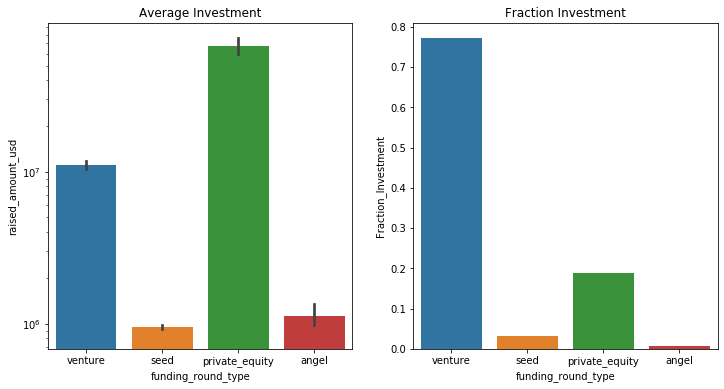

In [55]:
# plotting the graph
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.yscale('log')
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=funding_type_plot, estimator = np.mean)
plt.title("Average Investment")

plt.subplot(1, 2, 2)
sns.barplot(x='funding_round_type', y='Fraction_Investment', data=funding_type_plot)
plt.title("Fraction Investment")

plt.show()

In [56]:
top9

,raised_amount_usd
country_code,
USA,4.016268e+11
CHN,3.947413e+10
GBR,1.849351e+10
IND,1.419082e+10
CAN,8.886650e+09
FRA,6.835037e+09
ISR,6.664171e+09
DEU,6.374010e+09
JPN,3.220062e+09


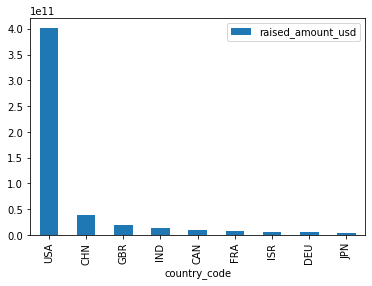

In [57]:
# plotting top9 countries graph where funding type is venture
top9.plot.bar()

In [69]:
# Creating dataframes as per the preferred sectors
plot_sector1 = D1.loc[(D1['Main_Sector'] == 'Others') | (D1['Main_Sector'] == 'Cleantech / Semiconductors') | (D1['Main_Sector'] == 'Social, Finance, Analytics, Advertising')]
plot_sector2 = D2.loc[(D2['Main_Sector'] == 'Others') | (D2['Main_Sector'] == 'Cleantech / Semiconductors') | (D2['Main_Sector'] == 'Social, Finance, Analytics, Advertising')]
plot_sector3 = D3.loc[(D3['Main_Sector'] == 'Others') | (D3['Main_Sector'] == 'News, Search and Messaging') | (D3['Main_Sector'] == 'Social, Finance, Analytics, Advertising')]

In [70]:
# concatinating row-wise all the dataframes created above
plot_sector = pd.concat([plot_sector1, plot_sector2], axis=0)
plot_sector = pd.concat([plot_sector, plot_sector3], axis=0)
plot_sector.head()

,permalink,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Primary_Sector,Main_Sector,Sector_Count,Sector_Investment
91,/ORGANIZATION/128-TECHNOLOGY,128 Technology,Service Providers|Technology,operating,USA,/ORGANIZATION/128-TECHNOLOGY,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11999347.0,Service Providers,Others,2732,2732
118,/ORGANIZATION/170-SYSTEMS,170 Systems,Software,acquired,USA,/ORGANIZATION/170-SYSTEMS,/funding-round/b84bb882ca873f5fb96535671981196d,venture,16-04-2002,14000000.0,Software,Others,2732,2732
124,/ORGANIZATION/17ZUOYE,17zuoye,Education|Language Learning,operating,USA,/ORGANIZATION/17ZUOYE,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,01-01-2011,5000000.0,Education,Others,2732,2732
125,/ORGANIZATION/17ZUOYE,17zuoye,Education|Language Learning,operating,USA,/ORGANIZATION/17ZUOYE,/funding-round/8d87f771e938e0f31641bd600abbafca,venture,01-09-2013,10000000.0,Education,Others,2732,2732
158,/ORGANIZATION/1STDIBS,1stdibs,E-Commerce,operating,USA,/ORGANIZATION/1STDIBS,/funding-round/292b074d073fdd9c7e9d8f372c3aa5f6,venture,24-01-2014,15000000.0,E-Commerce,Others,2732,2732


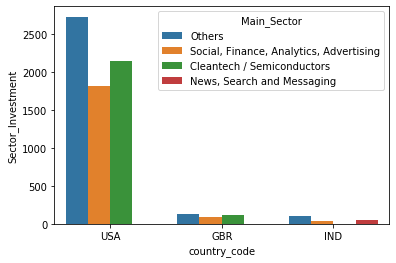

In [72]:
# plotting the graph
sns.barplot(x='country_code', y='Sector_Investment',hue='Main_Sector' ,data=plot_sector)